In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_excel('./환경데이터.xlsx')

In [3]:
data.head()

,Unnamed: 0,종목코드,종목명,종가,대비,등락률,상장시가총액,고유번호,업종코드,업종대분류,온실가스배출량,에너지사용량,매출액,온실가스배출량/매출액(tCO2/억원),에너지사용량/매출액(TJ/억원)
0,0,5930,삼성전자,77400,800,1.04,462061169,126380,264,제조업,12531900.0,177122.0,1.663112e+14,7.54,0.1065
1,1,660,SK하이닉스,106000,-1000,-0.93,77168251,164779,2612,제조업,4691884.0,80758.0,3.052499e+13,15.37,0.2646
2,2,35420,NAVER,451500,-1000,-0.22,74164923,266961,63120,정보통신업,77420.0,1398.0,4.126629e+12,1.88,0.0339
3,3,35720,카카오,154000,-2500,-1.60,68484900,258801,63120,정보통신업,76926.0,1585.0,1.779200e+12,NaN,NaN
4,4,207940,삼성바이오로직스,951000,0,0.00,62922915,877059,21102,제조업,124807.0,2529.0,1.164777e+12,10.72,0.2171


In [4]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

data.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액,고유번호,업종코드,업종대분류,온실가스배출량,에너지사용량,매출액,온실가스배출량/매출액(tCO2/억원),에너지사용량/매출액(TJ/억원)
0,5930,삼성전자,77400,800,1.04,462061169,126380,264,제조업,12531900.0,177122.0,1.663112e+14,7.54,0.1065
1,660,SK하이닉스,106000,-1000,-0.93,77168251,164779,2612,제조업,4691884.0,80758.0,3.052499e+13,15.37,0.2646
2,35420,NAVER,451500,-1000,-0.22,74164923,266961,63120,정보통신업,77420.0,1398.0,4.126629e+12,1.88,0.0339
3,35720,카카오,154000,-2500,-1.60,68484900,258801,63120,정보통신업,76926.0,1585.0,1.779200e+12,NaN,NaN
4,207940,삼성바이오로직스,951000,0,0.00,62922915,877059,21102,제조업,124807.0,2529.0,1.164777e+12,10.72,0.2171


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   종목코드                  200 non-null    int64  
 1   종목명                   200 non-null    object 
 2   종가                    200 non-null    int64  
 3   대비                    200 non-null    int64  
 4   등락률                   200 non-null    float64
 5   상장시가총액                200 non-null    int64  
 6   고유번호                  200 non-null    int64  
 7   업종코드                  200 non-null    int64  
 8   업종대분류                 200 non-null    object 
 9   온실가스배출량               160 non-null    float64
 10  에너지사용량                155 non-null    float64
 11  매출액                   192 non-null    float64
 12  온실가스배출량/매출액(tCO2/억원)  136 non-null    float64
 13  에너지사용량/매출액(TJ/억원)     130 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory usage: 22.0+ KB


In [6]:
for i in range(200):
    data.loc[i, '종목코드'] = format(data.loc[i, '종목코드'], '06')
    data.loc[i, '업종코드'] = format(data.loc[i, '업종코드'], '06')
    data.loc[i, '고유번호'] = format(data.loc[i, '고유번호'], '08')

    if data.loc[i, '온실가스배출량'] and data.loc[i, '매출액']:
        data.loc[i, '온실가스배출량/매출액(tCO2/억원)'] = round((data.loc[i, '온실가스배출량']/(data.loc[i, '매출액']/100000000)), 2)

    if data.loc[i, '에너지사용량'] and data.loc[i, '매출액']:
        data.loc[i, '에너지사용량/매출액(TJ/억원)'] = round((data.loc[i, '에너지사용량']/(data.loc[i, '매출액']/100000000)), 4)
        
    
data.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액,고유번호,업종코드,업종대분류,온실가스배출량,에너지사용량,매출액,온실가스배출량/매출액(tCO2/억원),에너지사용량/매출액(TJ/억원)
0,005930,삼성전자,77400,800,1.04,462061169,00126380,000264,제조업,12531900.0,177122.0,1.663112e+14,7.54,0.1065
1,000660,SK하이닉스,106000,-1000,-0.93,77168251,00164779,002612,제조업,4691884.0,80758.0,3.052499e+13,15.37,0.2646
2,035420,NAVER,451500,-1000,-0.22,74164923,00266961,063120,정보통신업,77420.0,1398.0,4.126629e+12,1.88,0.0339
3,035720,카카오,154000,-2500,-1.60,68484900,00258801,063120,정보통신업,76926.0,1585.0,1.779200e+12,4.32,0.0891
4,207940,삼성바이오로직스,951000,0,0.00,62922915,00877059,021102,제조업,124807.0,2529.0,1.164777e+12,10.72,0.2171


In [7]:
new_environment = data[['온실가스배출량/매출액(tCO2/억원)', '에너지사용량/매출액(TJ/억원)']]
new_environment

,온실가스배출량/매출액(tCO2/억원),에너지사용량/매출액(TJ/억원)
0,7.54,0.1065
1,15.37,0.2646
2,1.88,0.0339
3,4.32,0.0891
4,10.72,0.2171
...,...,...
195,NaN,NaN
196,19.53,0.4185
197,NaN,NaN
198,NaN,NaN


<ipython-input-8-7566410e4a91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_environment.dropna(inplace=True)


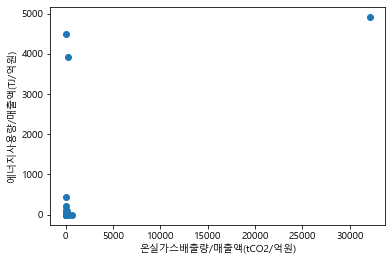

In [8]:
new_environment.dropna(inplace=True)

plt.scatter(new_environment['온실가스배출량/매출액(tCO2/억원)'], new_environment['에너지사용량/매출액(TJ/억원)'])
plt.xlabel('온실가스배출량/매출액(tCO2/억원)')
plt.ylabel('에너지사용량/매출액(TJ/억원)')

plt.show()

In [9]:
data.to_excel('환경데이터(최종).xlsx')